In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### Voting분류기

In [7]:
lr_clf = LogisticRegression()

In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [9]:
#보팅분류기
vo_clf = VotingClassifier([('LR',lr_clf),('KNN',knn_clf)],voting='soft')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   test_size=0.2,
                                                   random_state=156)

In [11]:
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9473684210526315

In [12]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print(f'{classifier.__class__.__name__} 정확도 : {accuracy_score(y_test,pred):.4f}')

LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


##### Randomforest 분류기

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
def get_new_feature_name_df(old):
    feature_dup_df = pd.DataFrame(data=old.groupby('column_name').cumcount(), 
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old.reset_index(), feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df =new_feature_name_df.drop(columns=['index'])
    return new_feature_name_df

def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt',
                              sep='\s+',
                              header=None,
                              names=['column_index','column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    y_train = pd.read_csv('human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9253478113335596

In [17]:
vo_clf = VotingClassifier([('LR',lr_clf),('KNN',knn_clf)],voting='soft')
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9565659993213438

In [18]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print(f'{classifier.__class__.__name__} 정확도 : {accuracy_score(y_test,pred):.4f}')

LogisticRegression 정확도 : 0.9593
KNeighborsClassifier 정확도 : 0.9074


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
%%time
params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_split':[8,12,18],
    'min_samples_leaf':[5,16,20]
}
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
grid_cv.best_params_,grid_cv.best_score_

Wall time: 23 s


({'max_depth': 12,
  'min_samples_leaf': 5,
  'min_samples_split': 18,
  'n_estimators': 100},
 0.9164853101196954)

In [21]:
rf_clf = RandomForestClassifier(max_depth=10,
                                min_samples_leaf=8,
                                min_samples_split=18,
                                n_estimators=300,
                                random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9175432643366135

#### GBM

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [24]:
%%time
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f'GBM 정확도 : {gb_accuracy:.4f}')

GBM 정확도 : 0.9389
Wall time: 7min 48s


#### XGBoost

In [58]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [28]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [29]:
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [30]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [31]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    y_label,
                                                    test_size=0.2,
                                                    random_state=156)

In [33]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [34]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [36]:
params = {
    'max_depth':3,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds=400

wlist = [(dtrain,'train'),(dtest,'test(=eval)')]
xgb_model = xgb.train(params = params,
                      dtrain = dtrain,
                      num_boost_round = num_rounds,
                      early_stopping_rounds = 100,
                      evals = wlist)

[16:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.46775	test(=eval)-logloss:0.47984
[1]	train-logloss:0.33578	test(=eval)-logloss:0.36218
[2]	train-logloss:0.25254	test(=eval)-logloss:0.29004
[3]	train-logloss:0.19584	test(=eval)-logloss:0.23382
[4]	train-logloss:0.15664	test(=eval)-logloss:0.19901
[5]	train-logloss:0.12663	test(=eval)-logloss:0.17469
[6]	train-logloss:0.10353	test(=eval)-logloss:0.15549
[7]	train-logloss:0.08545	test(=eval)-logloss:0.13367
[8]	train-logloss:0.07277	test(=eval)-logloss:0.12411
[9]	train-logloss:0.06333	test(=eval)-logloss:0.11611
[10]	train-logloss:0.05484	test(=eva

In [38]:
pred_probs = xgb_model.predict(dtest)
pred_probs

array([9.7849441e-01, 3.8310601e-03, 9.4475126e-01, 5.4276973e-02,
       9.9449289e-01, 9.9998605e-01, 9.9978822e-01, 9.9959677e-01,
       9.9818242e-01, 7.6262520e-05, 8.5400556e-05, 8.7273998e-05,
       9.9985099e-01, 9.9994135e-01, 9.9899274e-01, 9.9138582e-01,
       9.9554789e-01, 9.9993980e-01, 9.9968743e-01, 9.9975663e-01,
       8.0555456e-04, 5.5488956e-01, 1.2712798e-04, 9.9998760e-01,
       1.5862775e-04, 6.6383767e-01, 2.2517648e-03, 1.5270994e-04,
       9.9968803e-01, 5.2804612e-02, 9.9891365e-01, 1.6868571e-04,
       9.9267286e-01, 7.9403830e-01, 1.2954368e-03, 5.3546857e-05,
       9.9951720e-01, 9.9932575e-01, 3.0032575e-01, 9.9990332e-01,
       1.1817576e-01, 9.9840575e-01, 9.9957114e-01, 9.9984813e-01,
       9.9951065e-01, 9.8719770e-01, 9.1385338e-03, 9.9985731e-01,
       9.9958748e-01, 9.9985397e-01, 9.9906081e-01, 2.7417587e-04,
       9.9958986e-01, 9.9991405e-01, 9.9980885e-01, 9.9966490e-01,
       9.9993479e-01, 9.9475622e-01, 9.9967134e-01, 9.7636569e

In [39]:
np.round(pred_probs,3)[:10]

array([0.978, 0.004, 0.945, 0.054, 0.994, 1.   , 1.   , 1.   , 0.998,
       0.   ], dtype=float32)

In [40]:
preds = [1 if x > 0.5 else 0 for x in pred_probs]

In [41]:
preds[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [46]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    print(f"정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}")

In [55]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 2 75]]
정확도 : 0.9649, 정밀도 : 0.9740, 재현율 : 0.9740, F1 : 0.9740, AUC : 0.9961


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

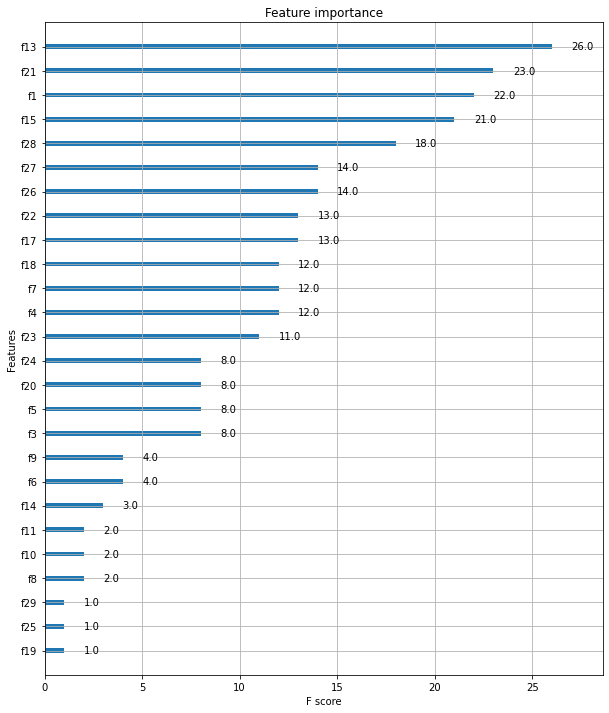

In [59]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax)

In [60]:
from xgboost import XGBClassifier

In [64]:
xgb_wrapper = XGBClassifier(n_estimators=400, learnin_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_pred = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_pred, w_pred_proba)

[16:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learnin_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870, F1 : 0.9806, AUC : 0.9961


In [67]:
xgb_wrapper = XGBClassifier(n_estimators=400, learnin_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, 
                early_stopping_rounds=100, 
                eval_metric='logloss', 
                eval_set=evals,
                verbose=True)
w_pred = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_pred, w_pred_proba)

[16:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learnin_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.47984
[1]	validation_0-logloss:0.36218
[2]	validation_0-logloss:0.29004
[3]	validation_0-logloss:0.23382
[4]	validation_0-logloss:0.19901
[5]	validation_0-logloss:0.17469
[6]	validation_0-logloss:0.15549
[7]	validation_0-logloss:0.13367
[8]	validation_0-logloss:0.12411
[9]	validation_0-logloss:0.11611
[10]	validation_0-logloss:0.10768
[11]	validation_0-logloss:0.10018
[12]	validation_0-logloss:0.09754
[13]	validation_0-logloss:0.08920
[14]	validation_0-logloss:0.09259
[15]	validation_0-logloss:0.09144
[16]	validation_0-logloss:0.09066
[17]	valida

In [69]:
xgb_wrapper.fit(X_train, y_train, 
                early_stopping_rounds=10, 
                eval_metric='logloss', 
                eval_set=evals,
                verbose=True)
ws10_pred = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_pred, ws10_pred_proba)
#early_stopping_rounds의 값을 적게 주면 학습이 되기전에 멈춰버림!

[16:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learnin_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.47984
[1]	validation_0-logloss:0.36218
[2]	validation_0-logloss:0.29004
[3]	validation_0-logloss:0.23382
[4]	validation_0-logloss:0.19901
[5]	validation_0-logloss:0.17469
[6]	validation_0-logloss:0.15549
[7]	validation_0-logloss:0.13367
[8]	validation_0-logloss:0.12411
[9]	validation_0-logloss:0.11611
[10]	validation_0-logloss:0.10768
[11]	validation_0-logloss:0.10018
[12]	validation_0-logloss:0.09754
[13]	validation_0-logloss:0.08920
[14]	validation_0-logloss:0.09259
[15]	validation_0-logloss:0.09144
[16]	validation_0-logloss:0.09066
[17]	valida